# An Analysis into the Indian Start-up Ecosystem


## BUSINESS UNDERSTANDING

ODYSSEY Inc. is planning to enter the Indian startup ecosystem. As the data expert on the team, I am tasked with conducting an in-depth analysis of the ecosystem to determine the factors that influence the funding received by startups in India. The goal is to identify whether the location of these startups plays a significant role in the amount of funding they receive.

The analysis will focus on startup funding data spanning from 2018 to 2021. Separate datasets will be provided for each year, encompassing information about the startups, the funding amounts they received, and details about the investors involved. The primary objective is to investigate and understand whether the location of startups in India has a meaningful impact on the funding they secure.

This analysis will inform ODYSSEY Inc.'s strategic decisions and help us devise the most effective course of action within the Indian startup ecosystem.

#                                               HYPOTHESIS

H0: Receiving more funds by startups in India is independent of their location.

Ha: Receiving more funds by startups in India depends on their location.

# Business Question

1. What is the trend in the amount of funding received by Indian startups over the years?
2.  Which sectors or industries received the highest amount of funding in India from 2018 to 2021?
3.  Do Startups in certain sectors tend to receive more funding than others based on their location
4.  What is the total funding amount received by Indian startups in different locations?
5.  What are the top 10 companies with the highest funding?
6.  What is the average amount of funds received by Indian startups at different stages of their life cycle?
7.  What are the startups that received the highest funding each year?
8.  Are there any patterns in the location of a company's headquarters and the amount of funding it receives?


# Data Understanding
# Resources Availability
Data for this project

In this project, the dataset resides in 3 places. For ease of access and security we have made the datasets available there in the GitHub Repository


-First Data Set

    The data for 2020 and 2021 were extracted from a database.


-Second Data Set

    The data for 2019 was found in OneDrive with file name startup_funding2019.cvs.


-Third Data Set

    The third part of the data (data for 2018) is hosted on a GitHub Repository in a file called startup_funding2018.csv.

# Importing Relevant Libraries

In [114]:
! pip install pyodbc
! pip install plotly 
! pip install  scipy
! pip install python-dotenv
! pip install scikit-learn
! pip install statsmodels
! pip install matplotlib
! pip install seaborn
! pip install fuzzywuzzy






[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\donto\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\donto\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\donto\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\donto\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\donto\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\donto\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\donto\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\donto\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\donto\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [115]:
import pyodbc 
import pandas as pd
import numpy as np
import re
import copy
from dotenv import dotenv_values 
from sklearn.impute import SimpleImputer
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from fuzzywuzzy import fuzz


import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as mtick

# LOADING  DATA FROM SQL SOURCES

In [116]:
#PULLING VARIABLES from an environment
environment_variables = dotenv_values('.env')
 
database = environment_variables.get("database_name")
server = environment_variables.get("server_name")
username = environment_variables.get("Login")
password = environment_variables.get("password")
 
# defining a connection string for connecting to our SQL server datatbase
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

# establish a database connection using the 'pyodbc' library
connection = pyodbc.connect(connection_string)


OperationalError: ('HYT00', '[HYT00] [Microsoft][ODBC SQL Server Driver]Login timeout expired (0) (SQLDriverConnect)')

* 2020 Dataset

In [ ]:
# SQL query to retrieve data from the 'LP1_startup_funding2020' table in a database
query2020 = "Select * from dbo.LP1_startup_funding2020"

# read the results of the SQL query into a DataFrame
df2020 = pd.read_sql(query2020, connection)

df2020=pd.DataFrame(df2020)

df2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


* 2021 Dataset

In [ ]:
# SQL query to retrieve data from the 'LP1_startup_funding2021' table in a database
query2021 = "Select * from dbo.LP1_startup_funding2021"

# read the results of the SQL query into a DataFrame
df2021 = pd.read_sql(query2021, connection)

df2021 = pd.DataFrame(df2021)

df2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


# Loading CSV Data files

* 2019 Dataset

In [ ]:
df2019 = pd.read_csv("startup_funding2019.CSV")

df2019=pd.DataFrame(df2019)

df2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


* 2018 Dataset

In [ ]:
df2018 = pd.read_csv("startup_funding2018.CSV")

df2018=pd.DataFrame(df2018)

df2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


# DATA CLEANING & EDA

* 2020 Dataset

In [ ]:
# Creating a copy of the dataset
df2020copy = copy.deepcopy(df2020)
df2020copy.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [ ]:
# Assuming df2020copy is already defined with some data
print('The number of rows and columns in this dataset is', df2020copy.shape, 'respectively')


The number of rows and columns in this dataset is (1055, 10) respectively


In [ ]:
# droping columns
columns_drop = ['Founders', 'Founded', 'Investor','column10']
df2020copy = df2020copy.drop(columns=columns_drop)

# add a year column in the data 
Year = [2020]*len(df2020copy)
df2020copy["Year"] = Year

# we rename specific columns
new_column_name = {'Company_Brand':'Company/Brand',
                  'What_it_does':'What it does' }
df2020copy = df2020copy.rename(columns=new_column_name) 

df2020copy.head()


,Company/Brand,HeadQuarter,Sector,What it does,Amount,Stage,Year
0,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,200000.0,None,2020
1,Krayonnz,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,100000.0,Pre-seed,2020
2,PadCare Labs,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,NaN,Pre-seed,2020
3,NCOME,New Delhi,Escrow,Escrow-as-a-service platform,400000.0,None,2020
4,Gramophone,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,340000.0,None,2020


In [ ]:
# display information about the DataFrame
df2020copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1055 non-null   object 
 1   HeadQuarter    961 non-null    object 
 2   Sector         1042 non-null   object 
 3   What it does   1055 non-null   object 
 4   Amount         801 non-null    float64
 5   Stage          591 non-null    object 
 6   Year           1055 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 57.8+ KB


In [ ]:
# Changing 'Year' column to datetime
df2020copy['Year'] = pd.to_datetime(df2020copy['Year'], format='%Y')

# Verifying the changes
print(df2020copy.dtypes)

Company/Brand            object
HeadQuarter              object
Sector                   object
What it does             object
Amount                  float64
Stage                    object
Year             datetime64[ns]
dtype: object


In [ ]:
#Checking for NAN values
df2020copy.isnull().sum()

Company/Brand      0
HeadQuarter       94
Sector            13
What it does       0
Amount           254
Stage            464
Year               0
dtype: int64

In [ ]:
df2020copy.describe()


,Amount
count,8.010000e+02
mean,1.130430e+08
std,2.476635e+09
min,1.270000e+04
25%,1.000000e+06
50%,3.000000e+06
75%,1.100000e+07
max,7.000000e+10


In [ ]:
# display the Amount column only
df2020copy['Amount']

0         200000.0
1         100000.0
2              NaN
3         400000.0
4         340000.0
           ...    
1050     1500000.0
1051    13200000.0
1052     8000000.0
1053     8043000.0
1054     9000000.0
Name: Amount, Length: 1055, dtype: float64

In [ ]:
# Select Amount column with null values
null_columns = ["Amount"]
 
# a SimpleImputer to fill null values wih median
imputer = SimpleImputer(strategy='median', fill_value = 'NaN')
 
# Apply the imputer to fill null values in selected columns
df2020copy[null_columns] = imputer.fit_transform(df2020copy[null_columns])

# verify changes
df2020copy.isnull().sum()

Company/Brand      0
HeadQuarter       94
Sector            13
What it does       0
Amount             0
Stage            464
Year               0
dtype: int64

In [ ]:
df2020copy['HeadQuarter']

0         Chennai
1       Bangalore
2            Pune
3       New Delhi
4          Indore
          ...    
1050        Delhi
1051         None
1052       Mumbai
1053        Delhi
1054      Chennai
Name: HeadQuarter, Length: 1055, dtype: object

In [ ]:
#  Using the lamda function to extract the city names from the 'HeadQuarter' column
df2020copy['HeadQuarter'] = df2020copy['HeadQuarter'].apply(lambda x: x.split(',')[0].strip() if x is not None else None)

df2020copy['HeadQuarter'].unique

<bound method Series.unique of 0         Chennai
1       Bangalore
2            Pune
3       New Delhi
4          Indore
          ...    
1050        Delhi
1051         None
1052       Mumbai
1053        Delhi
1054      Chennai
Name: HeadQuarter, Length: 1055, dtype: object>

In [ ]:
missing_values = df2020copy[df2020copy['HeadQuarter'].isnull()]
missing_values

,Company/Brand,HeadQuarter,Sector,What it does,Amount,Stage,Year
87,Habitat,None,EdTech,"Habitat, a social learning edtech platform for...",600000.0,Seed,2020-01-01
92,Raskik,None,Fusion beverages,All new fusion-flavour fruit juices with the g...,1000000.0,Pre-series A,2020-01-01
95,Pravasirojgar,None,Job portal,Initiative for blue-collar job workers,33000000.0,None,2020-01-01
121,Kaagaz Scanner,None,Scanning app,Kaagaz Scanner is the Indian replacement to ba...,575000.0,None,2020-01-01
487,Exprs,None,Nano Distribution Network,"Nano Distribution Centres, enabling seamless c...",5660000.0,None,2020-01-01
...,...,...,...,...,...,...,...
1035,Byju,None,Edtech,Provides online learning classes,200000000.0,None,2020-01-01
1041,Shiksha,None,Edtech,It makes college selection easy for students l...,181000.0,None,2020-01-01
1045,XpressBees,None,Logistics,Provides end to end supply chain solutions,10000000.0,None,2020-01-01
1047,Wealth Bucket,None,Fintech,An online platform for mutual fund investments,3000000.0,None,2020-01-01


In [ ]:
# Replacing the null value with Not Available
df2020copy['HeadQuarter'].fillna('Not Available', inplace=True)

# Verify changes
df2020copy['HeadQuarter'].isnull().sum()

0

In [ ]:
df2020copy['Sector']

0                 AgriTech
1                   EdTech
2       Hygiene management
3                   Escrow
4                 AgriTech
               ...        
1050                Edtech
1051               Fintech
1052             Cosmetics
1053             Transport
1054              Logitech
Name: Sector, Length: 1055, dtype: object

In [ ]:
# count the occurrences of each unique value in the 'Sector' column using 'value_counts'
df2020copy['Sector'].value_counts()

Fintech                  80
Edtech                   67
FinTech                  51
EdTech                   40
E-commerce               33
                         ..
Jewellery                 1
AR startup                1
HR Tech startup           1
Automotive Startup        1
Automobile Technology     1
Name: Sector, Length: 302, dtype: int64

In [ ]:
# Convert all sector names to lowercase to ensure consistency as there are inconsistent spelling (e.g. FinTech and Fintech, EdTech and Edtech ).
df2020copy['Sector'] = df2020copy['Sector'].str.lower()

# Remove any leading and trailing whitespaces just incase from the sector names to handle variations caused by extra spaces
df2020copy['Sector'] = df2020copy['Sector'].str.strip()

# Verify changes by counting the occurrences of each unique value in the 'Sector' column using 'value_counts'
df2020copy['Sector'].value_counts()


fintech                  131
edtech                   107
healthtech                42
agritech                  38
e-commerce                33
                        ... 
jewellery                  1
ar startup                 1
hr tech startup            1
automotive startup         1
automobile technology      1
Name: Sector, Length: 285, dtype: int64

In [ ]:
# Filter rows with NaN values in the 'Sector' column
df2020copy['Sector'].isna().value_counts()

False    1042
True       13
Name: Sector, dtype: int64

In [ ]:
# Calculate the mode of the 'Sector' column
mode_sector = df2020copy['Sector'].mode()[0]

# Fill missing values in the 'Sector' column with the calculated mode because the column is categorical
df2020copy['Sector'].fillna(mode_sector, inplace=True)

# verify changes
df2020copy['Sector'].isna().value_counts()

False    1055
Name: Sector, dtype: int64

In [ ]:
df2020copy['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [ ]:
df2020copy['Stage'].value_counts()

Series A                 96
Seed                     80
Seed Round               69
Series B                 57
Pre series A             54
Pre-series A             53
Series C                 50
Series D                 22
Debt                     18
Pre Series A             12
Pre-seed                 11
Seed round                9
Series E                  6
Bridge                    6
Series F                  4
Pre-series B              4
Angel Round               4
Pre seed round            4
Pre-seed Round            2
Pre series B              2
Pre-Seed                  2
Seed Funding              2
Series B2                 2
Pre-series C              2
Seed funding              2
Pre-Series B              2
Seed Round & Series A     1
Series C, D               1
Mid series                1
Series D1                 1
Seed Investment           1
Pre series C              1
Pre-series                1
Bridge Round              1
Series H                  1
Seed A              

In [ ]:
# Mapping stage column to in order to standardize variations like 'Pre series A', 'Pre-series A', and 'Pre Series A' to 'Pre-Series A'
stage_mapping = {
    'Series A': 'Series A',
    'Seed': 'Seed',
    'Seed Round': 'Seed',
    'Series B': 'Series B',
    'Pre series A': 'Pre-Series A',
    'Pre-series A': 'Pre-Series A',
    'Series C': 'Series C',
    'Series D': 'Series D',
    'Debt': 'Debt',
    'Pre Series A': 'Pre-Series A',
    'Pre-seed': 'Pre-Seed',
    'Seed round': 'Seed',
    'Series E': 'Series E',
    'Bridge': 'Bridge',
    'Series F': 'Series F',
    'Pre-series B': 'Pre-Series B',
    'Angel Round': 'Angel Round',
    'Pre seed round': 'Pre-Seed',
    'Pre-seed Round': 'Pre-Seed',
    'Pre series B': 'Pre-Series B',
    'Pre-Seed': 'Pre-Seed',
    'Seed Funding': 'Seed Funding',
    'Series B2': 'Series B',
    'Pre-series C': 'Pre-Series C',
    'Seed funding': 'Seed Funding',
    'Pre-Series B': 'Pre-Series B',
    'Seed Round & Series A': 'Seed',
    'Series C, D': 'Series C',
    'Mid series': 'Mid Series',
    'Series D1': 'Series D',
    'Seed Investment': 'Seed Funding',
    'Pre series C': 'Pre-Series C',
    'Pre-series': 'Pre-Series',
    'Bridge Round': 'Bridge',
    'Series H': 'Series H',
    'Seed A': 'Seed',
    'Pre- series A': 'Pre-Series A',
    'Series E2': 'Series E',
    'Pre series A1': 'Pre-Series A',
    'Edge': 'Edge',
    'Pre seed Round': 'Pre-Seed',
    'Series A-1': 'Series A'
}

# Apply the mapping to the 'Stage' column
df2020copy['Stage'] = df2020copy['Stage'].map(stage_mapping)



In [ ]:
# verify changes by printing out the value_counts
df2020copy['Stage'].value_counts()

Seed            160
Pre-Series A    121
Series A         97
Series B         59
Series C         51
Series D         23
Pre-Seed         20
Debt             18
Pre-Series B      8
Series E          7
Bridge            7
Seed Funding      5
Series F          4
Angel Round       4
Pre-Series C      3
Pre-Series        1
Edge              1
Series H          1
Mid Series        1
Name: Stage, dtype: int64

In [ ]:
df2020copy['Stage'].isnull

<bound method Series.isnull of 0            NaN
1       Pre-Seed
2       Pre-Seed
3            NaN
4            NaN
          ...   
1050         NaN
1051        Seed
1052         NaN
1053    Series C
1054    Series A
Name: Stage, Length: 1055, dtype: object>

In [ ]:
df2020copy.head(20)

,Company/Brand,HeadQuarter,Sector,What it does,Amount,Stage,Year
0,Aqgromalin,Chennai,agritech,Cultivating Ideas for Profit,200000.0,NaN,2020-01-01
1,Krayonnz,Bangalore,edtech,An academy-guardian-scholar centric ecosystem ...,100000.0,Pre-Seed,2020-01-01
2,PadCare Labs,Pune,hygiene management,Converting bio-hazardous waste to harmless waste,3000000.0,Pre-Seed,2020-01-01
3,NCOME,New Delhi,escrow,Escrow-as-a-service platform,400000.0,NaN,2020-01-01
4,Gramophone,Indore,agritech,Gramophone is an AgTech platform enabling acce...,340000.0,NaN,2020-01-01
5,qZense,Bangalore,agritech,qZense Labs is building the next-generation Io...,600000.0,Seed,2020-01-01
6,MyClassboard,Hyderabad,edtech,MyClassboard is a full-fledged School / Colleg...,600000.0,Pre-Series A,2020-01-01
7,Metvy,Gurgaon,networking platform,AI driven networking platform for individuals ...,3000000.0,Pre-Series,2020-01-01
8,Rupeek,Bangalore,fintech,Rupeek is an online lending platform that spec...,45000000.0,Series C,2020-01-01
9,Gig India,Pune,crowdsourcing,GigIndia is a marketplace that provides on-dem...,1000000.0,Pre-Series A,2020-01-01


In [ ]:
# SQL query to retrieve data from the 'LP1_startup_funding2021' table in a database
query2021 = "Select * from dbo.LP1_startup_funding2021"

# read the results of the SQL query into a DataFrame
df2021 = pd.read_sql(query2021, connection)

df2021 = pd.DataFrame(df2021)

df2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [ ]:
# Creating a copy of the dataset
df2021copy = copy.deepcopy(df2021)
df2021copy.head()


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [ ]:
# cleaning the 2021 data: we are to add year column & check dublicates and drop specific columns.

## droping columns
columns_drop = ['Founders', 'Founded', 'Investor']
df2021copy = df2021copy.drop(columns=columns_drop)

# Check for duplicates
df2021copy.duplicated()

# add a year column in the data 
Year = [2021]*len(df2021copy)
df2021copy["Year"] = Year

# we rename specific columns
new_column_name = {'Company_Brand':'Company/Brand',
                  'What_it_does':'What it does' }
df2021copy = df2021copy.rename(columns=new_column_name) 

df2021copy.head()

,Company/Brand,HeadQuarter,Sector,What it does,Amount,Stage,Year
0,Unbox Robotics,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"$1,200,000",Pre-series A,2021
1,upGrad,Mumbai,EdTech,UpGrad is an online higher education platform.,"$120,000,000",None,2021
2,Lead School,Mumbai,EdTech,LEAD School offers technology based school tra...,"$30,000,000",Series D,2021
3,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"$51,000,000",Series C,2021
4,FypMoney,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...","$2,000,000",Seed,2021


In [ ]:
df2021copy

,Company/Brand,HeadQuarter,Sector,What it does,Amount,Stage,Year
0,Unbox Robotics,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"$1,200,000",Pre-series A,2021
1,upGrad,Mumbai,EdTech,UpGrad is an online higher education platform.,"$120,000,000",None,2021
2,Lead School,Mumbai,EdTech,LEAD School offers technology based school tra...,"$30,000,000",Series D,2021
3,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"$51,000,000",Series C,2021
4,FypMoney,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...","$2,000,000",Seed,2021
...,...,...,...,...,...,...,...
1204,Gigforce,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,$3000000,Pre-series A,2021
1205,Vahdam,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,$20000000,Series D,2021
1206,Leap Finance,Bangalore,Financial Services,International education loans for high potenti...,$55000000,Series C,2021
1207,CollegeDekho,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",$26000000,Series B,2021


In [ ]:
df2021copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1209 non-null   object
 1   HeadQuarter    1208 non-null   object
 2   Sector         1209 non-null   object
 3   What it does   1209 non-null   object
 4   Amount         1206 non-null   object
 5   Stage          781 non-null    object
 6   Year           1209 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 66.2+ KB


In [ ]:
# Changing 'Year' column to datetime
df2021copy['Year'] = pd.to_datetime(df2021copy['Year'], format='%Y')

# Verifying the changes
print(df2021copy.dtypes)

Company/Brand            object
HeadQuarter              object
Sector                   object
What it does             object
Amount                   object
Stage                    object
Year             datetime64[ns]
dtype: object


In [ ]:
#Checking for NAN values
df2021copy.isnull().sum()

Company/Brand      0
HeadQuarter        1
Sector             0
What it does       0
Amount             3
Stage            428
Year               0
dtype: int64

In [ ]:
df2021copy.describe()

,Company/Brand,HeadQuarter,Sector,What it does,Amount,Stage,Year
count,1209,1208,1209,1209,1206,781,1209
unique,1033,70,254,1143,278,31,1
top,BharatPe,Bangalore,FinTech,BharatPe develops a QR code-based payment app ...,$Undisclosed,Seed,2021-01-01 00:00:00
freq,8,426,122,4,73,246,1209
first,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01 00:00:00


In [ ]:
# Cleaning the 'Amount' column by removing commas and currency symbols
df2021copy['Amount'] = pd.to_numeric(df2021copy['Amount'].replace('[\$,]', '', regex=True), errors='coerce')

# Calculate the median of the 'Amount' column
median = df2021copy['Amount'].median()

# Fill missing values in the 'Amount' column with the calculated median
df2021copy['Amount'].fillna(median, inplace=True)

# Checking the results
df2021copy.isnull().sum()

Company/Brand      0
HeadQuarter        1
Sector             0
What it does       0
Amount             0
Stage            428
Year               0
dtype: int64

In [ ]:
df2021copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company/Brand  1209 non-null   object        
 1   HeadQuarter    1208 non-null   object        
 2   Sector         1209 non-null   object        
 3   What it does   1209 non-null   object        
 4   Amount         1209 non-null   float64       
 5   Stage          781 non-null    object        
 6   Year           1209 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 66.2+ KB


In [ ]:
df2021copy.describe()

,Amount
count,1.209000e+03
mean,1.491720e+08
std,4.313929e+09
min,1.000000e+04
25%,1.000000e+06
50%,3.500000e+06
75%,1.100000e+07
max,1.500000e+11


In [ ]:
df2021copy

,Company/Brand,HeadQuarter,Sector,What it does,Amount,Stage,Year
0,Unbox Robotics,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,1200000.0,Pre-series A,2021-01-01
1,upGrad,Mumbai,EdTech,UpGrad is an online higher education platform.,120000000.0,None,2021-01-01
2,Lead School,Mumbai,EdTech,LEAD School offers technology based school tra...,30000000.0,Series D,2021-01-01
3,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,51000000.0,Series C,2021-01-01
4,FypMoney,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",2000000.0,Seed,2021-01-01
...,...,...,...,...,...,...,...
1204,Gigforce,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,3000000.0,Pre-series A,2021-01-01
1205,Vahdam,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,20000000.0,Series D,2021-01-01
1206,Leap Finance,Bangalore,Financial Services,International education loans for high potenti...,55000000.0,Series C,2021-01-01
1207,CollegeDekho,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",26000000.0,Series B,2021-01-01


In [ ]:
df2019 = pd.read_csv("startup_funding2019.CSV")
df2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [ ]:
# Creating a copy of the 2019 dataset
df2019copy = df2019
df2019copy

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [ ]:
# cleaning the 2020 data: we are to add year column & check dublicates and drop specific columns.

## droping columns
columns_drop = ['Founders', 'Founded', 'Investor']
df2019copy = df2019copy.drop(columns=columns_drop)

# Check for duplicates
df2019copy.duplicated()

# add a year column in the data 
Year = [2019]*len(df2019copy)
df2019copy["Year"] = Year

df2019copy.head()

,Company/Brand,HeadQuarter,Sector,What it does,Amount($),Stage,Year
0,Bombay Shaving,NaN,Ecommerce,Provides a range of male grooming products,"$6,300,000",NaN,2019
1,Ruangguru,Mumbai,Edtech,A learning platform that provides topic-based ...,"$150,000,000",Series C,2019
2,Eduisfun,Mumbai,Edtech,It aims to make learning fun via games.,"$28,000,000",Fresh funding,2019
3,HomeLane,Chennai,Interior design,Provides interior designing solutions,"$30,000,000",Series D,2019
4,Nu Genes,Telangana,AgriTech,"It is a seed company engaged in production, pr...","$6,000,000",NaN,2019


In [ ]:
# we rename 'Amount($)' column to 'Amount'
new_column_name = {'Amount($)':'Amount'}
df2019copy = df2019copy.rename(columns=new_column_name)

df2019copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  89 non-null     object
 1   HeadQuarter    70 non-null     object
 2   Sector         84 non-null     object
 3   What it does   89 non-null     object
 4   Amount         89 non-null     object
 5   Stage          43 non-null     object
 6   Year           89 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 5.0+ KB


In [ ]:
# Changing 'Year' column to datetime
df2019copy['Year'] = pd.to_datetime(df2019copy['Year'], format='%Y')

# Verifying the changes
print(df2019copy.dtypes)

Company/Brand            object
HeadQuarter              object
Sector                   object
What it does             object
Amount                   object
Stage                    object
Year             datetime64[ns]
dtype: object


In [ ]:
#Checking for NAN values
df2019copy.isnull().sum()

Company/Brand     0
HeadQuarter      19
Sector            5
What it does      0
Amount            0
Stage            46
Year              0
dtype: int64

In [ ]:
df2019copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company/Brand  89 non-null     object        
 1   HeadQuarter    70 non-null     object        
 2   Sector         84 non-null     object        
 3   What it does   89 non-null     object        
 4   Amount         89 non-null     object        
 5   Stage          43 non-null     object        
 6   Year           89 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 5.0+ KB


In [ ]:
df2019copy

,Company/Brand,HeadQuarter,Sector,What it does,Amount,Stage,Year
0,Bombay Shaving,NaN,Ecommerce,Provides a range of male grooming products,"$6,300,000",NaN,2019-01-01
1,Ruangguru,Mumbai,Edtech,A learning platform that provides topic-based ...,"$150,000,000",Series C,2019-01-01
2,Eduisfun,Mumbai,Edtech,It aims to make learning fun via games.,"$28,000,000",Fresh funding,2019-01-01
3,HomeLane,Chennai,Interior design,Provides interior designing solutions,"$30,000,000",Series D,2019-01-01
4,Nu Genes,Telangana,AgriTech,"It is a seed company engaged in production, pr...","$6,000,000",NaN,2019-01-01
...,...,...,...,...,...,...,...
84,Infra.Market,Mumbai,Infratech,It connects client requirements to their suppl...,"$20,000,000",Series A,2019-01-01
85,Oyo,Gurugram,Hospitality,Provides rooms for comfortable stay,"$693,000,000",NaN,2019-01-01
86,GoMechanic,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"$5,000,000",Series B,2019-01-01
87,Spinny,Delhi,Automobile,Online car retailer,"$50,000,000",NaN,2019-01-01


In [ ]:
# Remove dollar signs and commas from the "Amount" column
df2019copy['Amount'] = df2019copy['Amount'].str.replace('[\$,]', '', regex=True)

# Convert the "Amount" column numeric values
df2019copy['Amount'] = pd.to_numeric(df2019copy['Amount'], errors='coerce', downcast='integer')

# Verify the changes
print(df2019copy.dtypes)



Company/Brand            object
HeadQuarter              object
Sector                   object
What it does             object
Amount                  float64
Stage                    object
Year             datetime64[ns]
dtype: object


In [ ]:
df2019copy

,Company/Brand,HeadQuarter,Sector,What it does,Amount,Stage,Year
0,Bombay Shaving,NaN,Ecommerce,Provides a range of male grooming products,6300000.0,NaN,2019-01-01
1,Ruangguru,Mumbai,Edtech,A learning platform that provides topic-based ...,150000000.0,Series C,2019-01-01
2,Eduisfun,Mumbai,Edtech,It aims to make learning fun via games.,28000000.0,Fresh funding,2019-01-01
3,HomeLane,Chennai,Interior design,Provides interior designing solutions,30000000.0,Series D,2019-01-01
4,Nu Genes,Telangana,AgriTech,"It is a seed company engaged in production, pr...",6000000.0,NaN,2019-01-01
...,...,...,...,...,...,...,...
84,Infra.Market,Mumbai,Infratech,It connects client requirements to their suppl...,20000000.0,Series A,2019-01-01
85,Oyo,Gurugram,Hospitality,Provides rooms for comfortable stay,693000000.0,NaN,2019-01-01
86,GoMechanic,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,5000000.0,Series B,2019-01-01
87,Spinny,Delhi,Automobile,Online car retailer,50000000.0,NaN,2019-01-01


In [ ]:
#Checking for NAN values
df2019copy.isnull().sum()

Company/Brand     0
HeadQuarter      19
Sector            5
What it does      0
Amount           12
Stage            46
Year              0
dtype: int64

In [ ]:
# Select Amount columns with null values
null_columns = ["Amount"]
 
# a SimpleImputer to fill null values wih median
imputer = SimpleImputer(strategy='median', fill_value = 'NaN')
 
# Apply the imputer to fill null values in selected columns
df2019copy[null_columns] = imputer.fit_transform(df2019copy[null_columns])

df2019copy.isnull().sum()

Company/Brand     0
HeadQuarter      19
Sector            5
What it does      0
Amount            0
Stage            46
Year              0
dtype: int64

In [ ]:
df2018 = pd.read_csv("startup_funding2018.CSV")

df2018=pd.DataFrame(df2018)

df2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [ ]:
# Creating a copy of the 2018 dataset
df2018copy = df2018
df2018copy

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [ ]:
# create a column haeder (Year) and populate it with the year '2018'
Year = [2018] * len(df2018copy)

df2018copy['Year'] = Year

df2018copy

,Company Name,Industry,Round/Series,Amount,Location,About Company,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018


In [ ]:
# Changing 'Year' column to datetime datatype
df2018copy['Year'] = pd.to_datetime(df2018copy['Year'], format='%Y')

# Verifying the changes
print(df2018copy.dtypes)

Company Name             object
Industry                 object
Round/Series             object
Amount                   object
Location                 object
About Company            object
Year             datetime64[ns]
dtype: object


In [ ]:
# Renaming specific columns names based on a predefined mapping of column names of other datasets (2019, 2020 and 2021)
new_column_names = {
    'Company Name': 'Company/Brand',
    'Industry': 'Sector',
    'Round/Series': 'Stage',
    'Location': 'HeadQuarter',
    'About Company': 'What it does'
}

# Rename the columns
df2018copy = df2018copy.rename(columns=new_column_names)

In [ ]:
df2018copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company/Brand  526 non-null    object        
 1   Sector         526 non-null    object        
 2   Stage          526 non-null    object        
 3   Amount         526 non-null    object        
 4   HeadQuarter    526 non-null    object        
 5   What it does   526 non-null    object        
 6   Year           526 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 28.9+ KB


In [ ]:
df2018copy

,Company/Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018-01-01
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018-01-01
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018-01-01
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018-01-01
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018-01-01
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018-01-01
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018-01-01
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018-01-01
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018-01-01


In [ ]:
# split HeadQuarter and Sector  into list and get first item
df2018copy['Sector'] = df2018copy['Sector'].str.split(',').str[0]
df2018copy['HeadQuarter'] = df2018copy['HeadQuarter'].str.split(',').str[0]
 
# verify result 
df2018copy[['HeadQuarter','Sector']].head()

,HeadQuarter,Sector
0,Bangalore,Brand Marketing
1,Mumbai,Agriculture
2,Gurgaon,Credit
3,Noida,Financial Services
4,Hyderabad,E-Commerce Platforms


In [ ]:
# replace/remove commas
df2018copy['Amount'] = df2018copy['Amount'].replace(',', '', regex=True)

# Using a function to extract currency symbol in the amount column
def extract_currency(amount):
    currencies = ['₹', '$']
    for currency in currencies:
        if currency in amount:
            return currency
    return None

# Extract currency symbols
df2018copy['Currency'] = df2018copy['Amount'].apply(extract_currency)

# Define exchange rate for Rupees to Dollars (The average INR/USD exchange rate for 2018 is 0.01461 US Dollars per Indian Rupee.)
rupees_to_dollars_rate = 0.01461 

# Convert to numeric, considering currency
df2018copy['Amount'] = pd.to_numeric(df2018copy['Amount'].replace('[\₹,$]', '', regex=True), errors='coerce')
df2018copy['Amount'] = df2018copy.apply(lambda row: row['Amount'] * rupees_to_dollars_rate if row['Currency'] == '₹' else row['Amount'], axis=1)

# Drop the 'Currency' column
df2018copy = df2018copy.drop(columns=['Currency'])


In [ ]:
df2018copy

,Company/Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018-01-01
1,Happy Cow Dairy,Agriculture,Seed,584400.0,Mumbai,A startup which aggregates milk from dairy far...,2018-01-01
2,MyLoanCare,Credit,Series A,949650.0,Gurgaon,Leading Online Loans Marketplace in India,2018-01-01
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018-01-01
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018-01-01
...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000.0,Bangalore,"Udaan is a B2B trade platform, designed specif...",2018-01-01
522,Happyeasygo Group,Tourism,Series A,NaN,Haryana,HappyEasyGo is an online travel domain.,2018-01-01
523,Mombay,Food and Beverage,Seed,7500.0,Mumbai,Mombay is a unique opportunity for housewives ...,2018-01-01
524,Droni Tech,Information Technology,Seed,511350.0,Mumbai,Droni Tech manufacture UAVs and develop softwa...,2018-01-01


In [ ]:
df2018copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company/Brand  526 non-null    object        
 1   Sector         526 non-null    object        
 2   Stage          526 non-null    object        
 3   Amount         378 non-null    float64       
 4   HeadQuarter    526 non-null    object        
 5   What it does   526 non-null    object        
 6   Year           526 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 28.9+ KB


In [ ]:
df2018copy.isnull().sum()

Company/Brand      0
Sector             0
Stage              0
Amount           148
HeadQuarter        0
What it does       0
Year               0
dtype: int64

In [ ]:
df2018copy.describe()

,Amount
count,3.780000e+02
mean,1.757308e+07
std,7.787738e+07
min,8.766000e+02
25%,5.000000e+05
50%,1.300000e+06
75%,5.000000e+06
max,1.000000e+09


In [ ]:
# Select Amount columns with null values
null_columns = ["Amount"]
 
# a SimpleImputer to fill null values wih median
imputer = SimpleImputer(strategy='median', fill_value = 'NaN')
 
# Apply the imputer to fill null values in selected columns
df2018copy[null_columns] = imputer.fit_transform(df2018copy[null_columns])

df2018copy.isnull().sum()

Company/Brand    0
Sector           0
Stage            0
Amount           0
HeadQuarter      0
What it does     0
Year             0
dtype: int64

# Concanating the 2018, 2019, 2020 and 2021 Dataset into one Dataframe

In [ ]:
df = pd.concat([df2018copy,df2019copy,df2020copy,df2021copy])

#reset index of the conc dataset
df = df.reset_index(drop=True)
df = pd.DataFrame(df)

df

,Company/Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018-01-01
1,Happy Cow Dairy,Agriculture,Seed,584400.0,Mumbai,A startup which aggregates milk from dairy far...,2018-01-01
2,MyLoanCare,Credit,Series A,949650.0,Gurgaon,Leading Online Loans Marketplace in India,2018-01-01
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018-01-01
4,Eunimart,E-Commerce Platforms,Seed,1300000.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018-01-01
...,...,...,...,...,...,...,...
2874,Gigforce,Staffing & Recruiting,Pre-series A,3000000.0,Gurugram,A gig/on-demand staffing company.,2021-01-01
2875,Vahdam,Food & Beverages,Series D,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2021-01-01
2876,Leap Finance,Financial Services,Series C,55000000.0,Bangalore,International education loans for high potenti...,2021-01-01
2877,CollegeDekho,EdTech,Series B,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021-01-01


In [ ]:
# Rename the 'Amount' column to 'Amount ($)'
df = df.rename(columns={'Amount': 'Amount ($)'})

# Verify the changes
df.head


<bound method NDFrame.head of         Company/Brand                 Sector         Stage  Amount ($)  \
0     TheCollegeFever        Brand Marketing          Seed    250000.0   
1     Happy Cow Dairy            Agriculture          Seed    584400.0   
2          MyLoanCare                 Credit      Series A    949650.0   
3         PayMe India     Financial Services         Angel   2000000.0   
4            Eunimart   E-Commerce Platforms          Seed   1300000.0   
...               ...                    ...           ...         ...   
2874         Gigforce  Staffing & Recruiting  Pre-series A   3000000.0   
2875           Vahdam       Food & Beverages      Series D  20000000.0   
2876     Leap Finance     Financial Services      Series C  55000000.0   
2877     CollegeDekho                 EdTech      Series B  26000000.0   
2878           WeRize     Financial Services      Series A   8000000.0   

     HeadQuarter                                       What it does       Year  


In [ ]:
# Reset the index of the DataFrame
df = df.reset_index(drop=True)

# Verify the changes
df.head()

,Company/Brand,Sector,Stage,Amount ($),HeadQuarter,What it does,Year
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018-01-01
1,Happy Cow Dairy,Agriculture,Seed,584400.0,Mumbai,A startup which aggregates milk from dairy far...,2018-01-01
2,MyLoanCare,Credit,Series A,949650.0,Gurgaon,Leading Online Loans Marketplace in India,2018-01-01
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018-01-01
4,Eunimart,E-Commerce Platforms,Seed,1300000.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018-01-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company/Brand  2879 non-null   object        
 1   Sector         2874 non-null   object        
 2   Stage          1941 non-null   object        
 3   Amount ($)     2879 non-null   float64       
 4   HeadQuarter    2859 non-null   object        
 5   What it does   2879 non-null   object        
 6   Year           2879 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 157.6+ KB


In [ ]:
df.shape

(2879, 7)

In [ ]:
df['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow', nan,
       'Telangana', 'Gurugram', 'Surat', 'Uttar pradesh', 'Rajasthan',
       'Tirunelveli', 'Not Available', 'Singapore', 'Gujarat', 'Kerala',
       'Frisco', 'California', 'Dhingsara', 'New York', 'Patna',
       'San Francisco', 'San Ramon', 'Paris', 'Plano', 'Sydney',
       'San Francisco Bay Area', 'Bangaldesh', 'London', 'Milano',
       'Palmwoods', 'France', 'Sa

In [ ]:
df['HeadQuarter'].value_counts()

Bangalore      866
Mumbai         474
Gurugram       239
New Delhi      232
Chennai        106
              ... 
France           1
Palmwoods        1
Milano           1
Bangaldesh       1
Gandhinagar      1
Name: HeadQuarter, Length: 134, dtype: int64

In [ ]:
# split HeadQuarter into list and get first item
df['HeadQuarter'] = df['HeadQuarter'].str.split(',').str[0]
 
# strip the \t#REF!
df['HeadQuarter'] = df['HeadQuarter'].apply(lambda x: str(x).replace('t#REF!',''))
 
#now remove some unwanted values in the col as sector values
unwanted_values = ['Computer Games',
                   'Pharmaceuticals',
                   'Food & Beverages',
                   'Information Technology & Services',
                   'Online Media',
                   'San Franciscao']
df = df[~df['HeadQuarter'].isin(unwanted_values)]

In [ ]:
df.shape

(2873, 7)

In [ ]:
df['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', nan, 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A',
       'Pre-Series A', 'Pre-Series', 'Debt', 'Pre-Series C',
       'Pre-Series B', 'Bridge', 'Edge', 'Seed Funding', 'Angel Round',
       'Mid Series', None, 'Pre-seed', 'Pre-series B', 'Seed+',
       'Series F2', 'Series A+', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-se

In [ ]:
# strip the 2, 3, +, 1, -1, 
df['Stage'] = df['Stage'].apply(lambda x: str(x).replace('2',''))
df['Stage'] = df['Stage'].apply(lambda x: str(x).replace('3',''))
df['Stage'] = df['Stage'].apply(lambda x: str(x).replace('+',''))
df['Stage'] = df['Stage'].apply(lambda x: str(x).replace('1',''))
df['Stage'] = df['Stage'].apply(lambda x: str(x).replace('-1',''))
  
 
#now remove some unwanted values in the col as sector values
unwanted_values = ['$300000',
                   '$6000000',
                   '$1000000',
                   'Secondary Market',
                   'Non-equity Assistance',
                   'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593']
df = df[~df['Stage'].isin(unwanted_values)]


In [ ]:
# Checking results of the above code
df['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/x9ziNeaz6auNChIHnMI8U6kS7knTrbyy_YBGfQaoUA/edit#gid=86059',
       'Series D', 'Post-IPO Equity', 'Funding Round', 'nan',
       'Fresh funding', 'Pre series A', 'Series G', 'Post series A',
       'Seed funding', 'Seed fund', 'Series F', 'Seed round',
       'Pre-series A', 'Pre-Series A', 'Pre-Series', 'Debt',
       'Pre-Series C', 'Pre-Series B', 'Bridge', 'Edge', 'Seed Funding',
       'Angel Round', 'Mid Series', 'None', 'Pre-seed', 'Pre-series B',
       'PE', '$00000', 'Early seed', '$000000', 'Seies A', 'Pre-series',
       'Series I'], dtype=object)

In [ ]:
# strip the -, 
df['Stage'] = df['Stage'].apply(lambda x: str(x).replace('-',''))

 
#now remove some unwanted values in the col as sector values
unwanted_values = ['$000000',
                   '$00000',
                   'https://docs.google.com/spreadsheets/d/x9ziNeaz6auNChIHnMI8U6kS7knTrbyy_YBGfQaoUA/edit#gid=86059']
df = df[~df['Stage'].isin(unwanted_values)]


In [ ]:
# Checking results of the above code
df['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'PreSeed',
       'Private Equity', 'Venture  Series Unknown', 'Grant',
       'Debt Financing', 'PostIPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed', 'Series D',
       'PostIPO Equity', 'Funding Round', 'nan', 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Seed round', 'Preseries A',
       'PreSeries A', 'PreSeries', 'Debt', 'PreSeries C', 'PreSeries B',
       'Bridge', 'Edge', 'Seed Funding', 'Angel Round', 'Mid Series',
       'None', 'Preseed', 'Preseries B', 'PE', 'Early seed', 'Seies A',
       'Preseries', 'Series I'], dtype=object)

In [ ]:
df['Company/Brand'].value_counts()


BharatPe                        10
Nykaa                            6
MPL                              6
Vedantu                          6
Trell                            6
                                ..
Genrobotics                      1
Reliance Retail Ventures Ltd     1
Chargebee                        1
Credit Wise Capital              1
WeRize                           1
Name: Company/Brand, Length: 2204, dtype: int64

In [ ]:
df['Sector'].value_counts()

fintech                     144
FinTech                     124
edtech                      107
EdTech                      106
Financial Services           86
                           ... 
saas  startup                 1
customer service company      1
personal care startup         1
startup laboratory            1
Staffing & Recruiting         1
Name: Sector, Length: 671, dtype: int64

In [ ]:
# Convert all sector names to lowercase to ensure consistency as there are inconsistent spelling (e.g. FinTech and Fintech, EdTech and Edtech ).
df['Sector'] = df['Sector'].str.lower()

# Remove any leading and trailing whitespaces just incase from the sector names to handle variations caused by extra spaces
df['Sector'] = df['Sector'].str.strip()

In [ ]:
# using fuzzy string matching techniques to further find similar strings in the Sector column and then standardizing them
def find_closest_match(sector, sector_list):
    # Handle cases where sector is not a string (e.g., it's a float)
    if not isinstance(sector, str):
        return sector
    
    return max(sector_list, key=lambda x: fuzz.ratio(sector, x))

unique_sectors = df['Sector'].dropna().unique()  # Drop NaN values to avoid issues
df['Sector'] = df['Sector'].apply(lambda x: find_closest_match(x, unique_sectors))


In [ ]:
df['Sector'].value_counts()

fintech                  273
edtech                   220
e-commerce                95
financial services        87
healthcare                67
                        ... 
online portals             1
mental health              1
appliance                  1
ar/vr                      1
staffing & recruiting      1
Name: Sector, Length: 553, dtype: int64

In [ ]:
# Assuming 'Sector' is the column containing sector names
unique_sectors = df['Sector'].unique()

# Convert the NumPy array to a pandas Series
sector_counts = pd.Series(unique_sectors).value_counts()

pd.set_option('display.max_rows', None)
# Display the sector counts
print(sector_counts)

brand marketing                                                                                                                               1
travel & saas                                                                                                                                 1
foodtech & logistics                                                                                                                          1
housing                                                                                                                                       1
data analytics                                                                                                                                1
investment tech                                                                                                                               1
dairy                                                                                                                                   

In [ ]:
df['What it does'].value_counts()

BYJU'S is an educational technology company that develops personalized learning programs for K-12 students.                                                                                                                                                 5
Provides online learning classes                                                                                                                                                                                                                            5
Mobile Premier League is a skill-based eSports platform used to offer cash prizes while playing games.                                                                                                                                                      4
Onine learning platform                                                                                                                                                                                                                       

In [ ]:
df['Amount ($)'].unique()

array([2.5000000e+05, 5.8440000e+05, 9.4965000e+05, 2.0000000e+06,
       1.3000000e+06, 1.6000000e+06, 2.3376000e+05, 7.3050000e+05,
       1.4610000e+06, 1.5000000e+05, 1.1000000e+06, 7.3050000e+03,
       6.0000000e+06, 6.5000000e+05, 5.1135000e+05, 9.3504000e+05,
       2.9220000e+05, 1.0000000e+06, 5.0000000e+06, 4.0000000e+06,
       4.3830000e+05, 2.8000000e+06, 1.7000000e+06, 7.3050000e+04,
       1.8262500e+05, 2.1915000e+05, 5.0000000e+05, 1.5194400e+06,
       6.5745000e+05, 1.3400000e+07, 3.6525000e+05, 3.8570400e+05,
       1.1688000e+05, 8.7660000e+02, 9.0000000e+06, 1.0000000e+05,
       2.0000000e+04, 1.2000000e+05, 4.9674000e+05, 4.9966200e+06,
       1.4314500e+05, 8.7660000e+06, 7.4200000e+08, 1.4610000e+07,
       2.9220000e+07, 3.9800000e+06, 1.0000000e+04, 1.4610000e+03,
       3.6525000e+06, 1.0000000e+09, 7.0000000e+06, 3.5000000e+07,
       8.0355000e+06, 2.8500000e+07, 3.5064000e+06, 1.7532000e+06,
       2.4000000e+06, 3.0000000e+07, 3.6525000e+07, 2.3000000e

In [ ]:
df.isnull().sum()

Company/Brand    0
Sector           5
Stage            0
Amount ($)       0
HeadQuarter      0
What it does     0
Year             0
dtype: int64

In [ ]:
# Filter rows with NaN values in the 'Sector' column
nan_values = df[df['Sector'].isna()]

# Display the DataFrame containing rows with NaN values in the 'Sector' column
print(nan_values)


         Company/Brand Sector         Stage   Amount ($) HeadQuarter  \
567              VMate    NaN           nan  100000000.0         nan   
575  Awign Enterprises    NaN      Series A    4000000.0   Bangalore   
578           TapChief    NaN  Pre series A    1500000.0   Bangalore   
582              KredX    NaN      Series B   26000000.0   Bangalore   
583            m.Paani    NaN      Series A    5500000.0      Mumbai   

                                          What it does       Year  
567                             A short video platform 2019-01-01  
575               It supplies workforce to the economy 2019-01-01  
578  It connects individuals in need of advice in a... 2019-01-01  
582                       Invoice discounting platform 2019-01-01  
583         It digitizes and organises local retailers 2019-01-01  


In [ ]:
# Replace 'None' with NaN in the 'Sector' column
df['Sector'] = df['Sector'].str.strip().replace('None', np.nan)

# Filter rows with NaN values in the 'Sector' column
nan_values = df[df['Sector'].isna()]

# Display the DataFrame containing rows with NaN values in the 'Sector' column
print(nan_values)



         Company/Brand Sector         Stage   Amount ($) HeadQuarter  \
567              VMate    NaN           nan  100000000.0         nan   
575  Awign Enterprises    NaN      Series A    4000000.0   Bangalore   
578           TapChief    NaN  Pre series A    1500000.0   Bangalore   
582              KredX    NaN      Series B   26000000.0   Bangalore   
583            m.Paani    NaN      Series A    5500000.0      Mumbai   

                                          What it does       Year  
567                             A short video platform 2019-01-01  
575               It supplies workforce to the economy 2019-01-01  
578  It connects individuals in need of advice in a... 2019-01-01  
582                       Invoice discounting platform 2019-01-01  
583         It digitizes and organises local retailers 2019-01-01  


In [ ]:
# Using the Simple imputer to fill the NaN values with 'undisclosed'
imputer = SimpleImputer(strategy='constant', fill_value='undisclosed')

df['Sector'] = imputer.fit_transform(df[['Sector']]).ravel()

In [ ]:
# Filter rows with NaN values in the 'Sector' column
nan_values = df[df['Sector'].isna()]

# Display the DataFrame containing rows with NaN values in the 'Sector' column
nan_values.dtypes

Company/Brand            object
Sector                   object
Stage                    object
Amount ($)              float64
HeadQuarter              object
What it does             object
Year             datetime64[ns]
dtype: object

In [ ]:
# replace "—" with "undisclosed,"
df['Sector'] = df['Sector'].replace('—', 'undisclosed')


In [ ]:
df['Sector'].unique

<bound method Series.unique of 0                                         brand marketing
1                                             agriculture
2                                                  credit
3                                      financial services
4                                    e-commerce platforms
5                                    cloud infrastructure
6                                                internet
7                                         market research
8                                    information services
9                                         mobile payments
10                                                    b2b
11                                               internet
12                                                   apps
13                                          food delivery
14                                  industrial automation
15                                             automotive
16                                       

In [ ]:
df.isnull().sum()

Company/Brand    0
Sector           0
Stage            0
Amount ($)       0
HeadQuarter      0
What it does     0
Year             0
dtype: int64

In [ ]:
df.shape

(2864, 7)

In [ ]:
# Dropping the NaN Values in the Sector column (less than 5% of the dataset)
df.dropna(subset=['Sector'], inplace=True)

df.shape

(2864, 7)

In [ ]:
# Checking for NaN values
df.isnull().sum()

Company/Brand    0
Sector           0
Stage            0
Amount ($)       0
HeadQuarter      0
What it does     0
Year             0
dtype: int64

In [ ]:
print(df.columns)

Index(['Company/Brand', 'Sector', 'Stage', 'Amount ($)', 'HeadQuarter',
       'What it does', 'Year'],
      dtype='object')


# Answering Business Questions

1. What is the trend in the amount of funding received by Indian startups over the years?

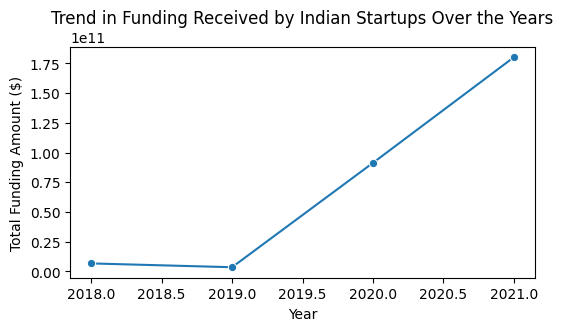

In [ ]:
# Group the data by year and sum the funding amounts
grouped_data = df.groupby(df['Year'].dt.year)['Amount ($)'].sum().reset_index()

# Plotting the trend
plt.figure(figsize=(6, 3))
sns.lineplot(x='Year', y='Amount ($)', data=grouped_data, marker='o')
plt.title('Trend in Funding Received by Indian Startups Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount ($)')
plt.show()

2.  Which sectors or industries received the highest amount of funding in India from 2018 to 2021?

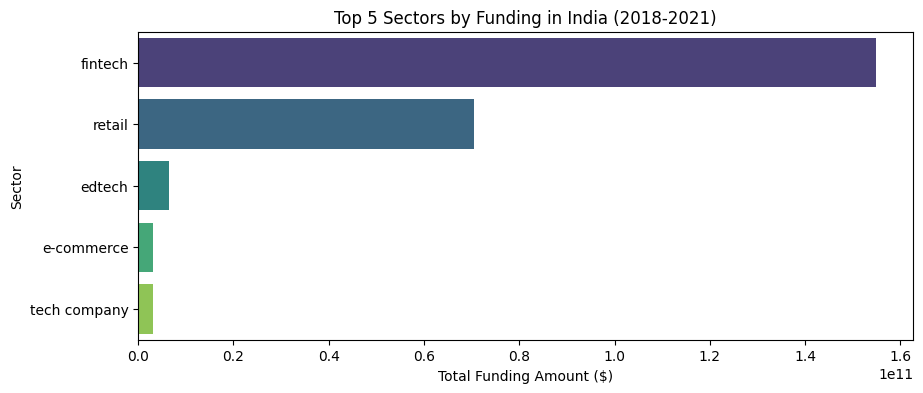

In [ ]:
# Filter data for the years 2018 to 2021 using the .isin() function
filtered_data = df[df['Year'].dt.year.isin([2018, 2019, 2020, 2021])]

# Group the data by sector and sum the funding amounts
sector_data = filtered_data.groupby('Sector')['Amount ($)'].sum().reset_index()

# Sort the data by total funding amount in descending order
sector_data = sector_data.sort_values(by='Amount ($)', ascending=False)

# Selecting the top 5 sectors
top_5_sectors = sector_data.head(5)

# Plotting the sectors with the highest funding
plt.figure(figsize=(10, 4))
sns.barplot(x='Amount ($)', y='Sector', data=top_5_sectors, palette='viridis')
plt.title('Top 5 Sectors by Funding in India (2018-2021)')
plt.xlabel('Total Funding Amount ($)')
plt.ylabel('Sector')
# plt.grid(axis='x')
plt.show()


3.  Do startups in certain sectors tend to receive more funding than others based on their location

<Figure size 1200x800 with 0 Axes>

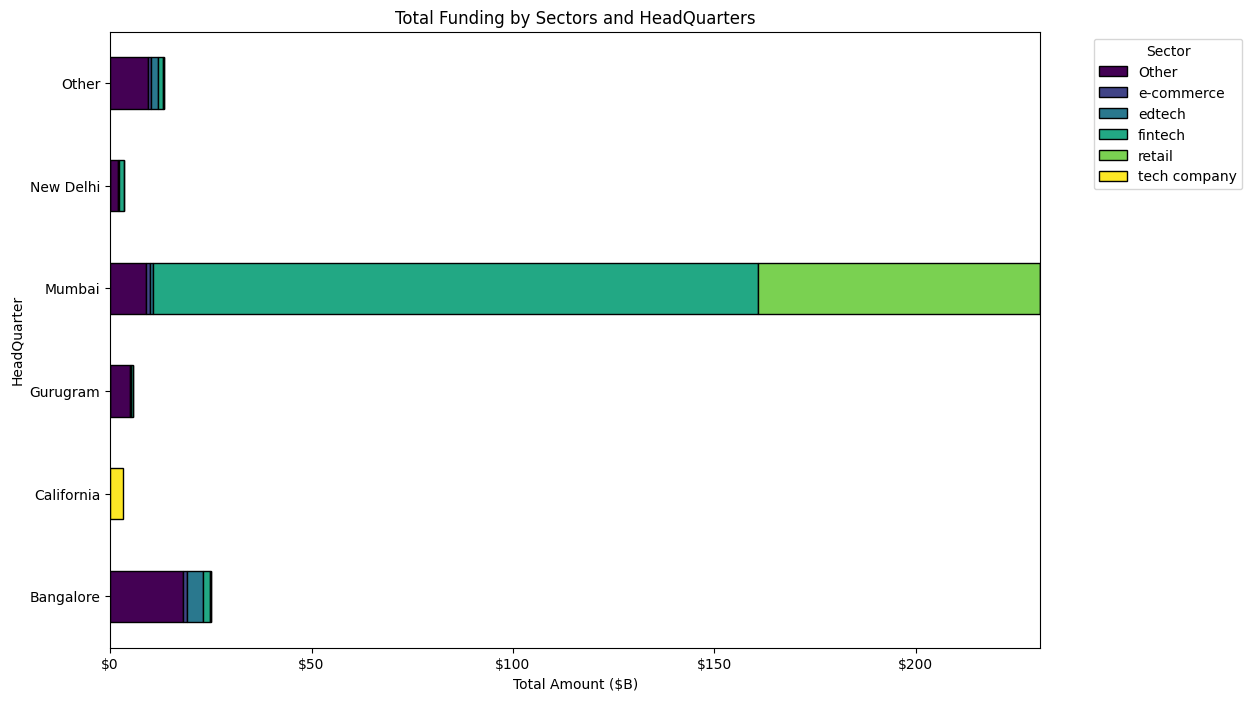

In [ ]:
# Group by 'Sector, 'HeadQuarter' and calculate the total funding for each group
# 'agg'function to apply different aggregation functions to different columns.  
grouped_df = df.groupby(['Sector', 'HeadQuarter']).agg({'Amount ($)': 'sum', 'Year': 'first'}).reset_index()
 
# get the top sectors with the highest total funding
top_5 = 5 
top_sectors = grouped_df.groupby('Sector')['Amount ($)'].sum().nlargest(top_5).index
 
# Create a column 'Sector_grouped' to categorize sectors from top sector
grouped_df['Sector_grouped'] = grouped_df['Sector'].apply(lambda x: x if x in top_sectors else 'Other')
 
# the top HeadQuarters with the highest total funding
top_hq = grouped_df.groupby('HeadQuarter')['Amount ($)'].sum().nlargest(top_5).index
 
# Create a new column 'HQ_grouped' to categorize HeadQuarters from top hq
grouped_df['HQ_grouped'] = grouped_df['HeadQuarter'].apply(lambda x: x if x in top_hq else 'Other')
 
# Aggregate data before pivoting
pivot_df = grouped_df.groupby(['HQ_grouped', 'Sector_grouped'])['Amount ($)'].sum().unstack().fillna(0)
 
# Convert 'Amount ($)' to billions with two significant figures and dividing by 1 billion
pivot_df = pivot_df / 1e9
 
# Plotting
plt.figure(figsize=(12, 8))
#sns.set(style="whitegrid")
ax = pivot_df.plot(kind='barh', stacked=True, colormap='viridis', edgecolor='k', figsize=(12, 8))
ax.set_ylabel('HeadQuarter')
ax.set_xlabel('Total Amount ($B)')
ax.set_title('Total Funding by Sectors and HeadQuarters')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.grid(False)
 
#plot legend (sector)
ax.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


4.  What is the total funding amount received by Indian startups in different locations?


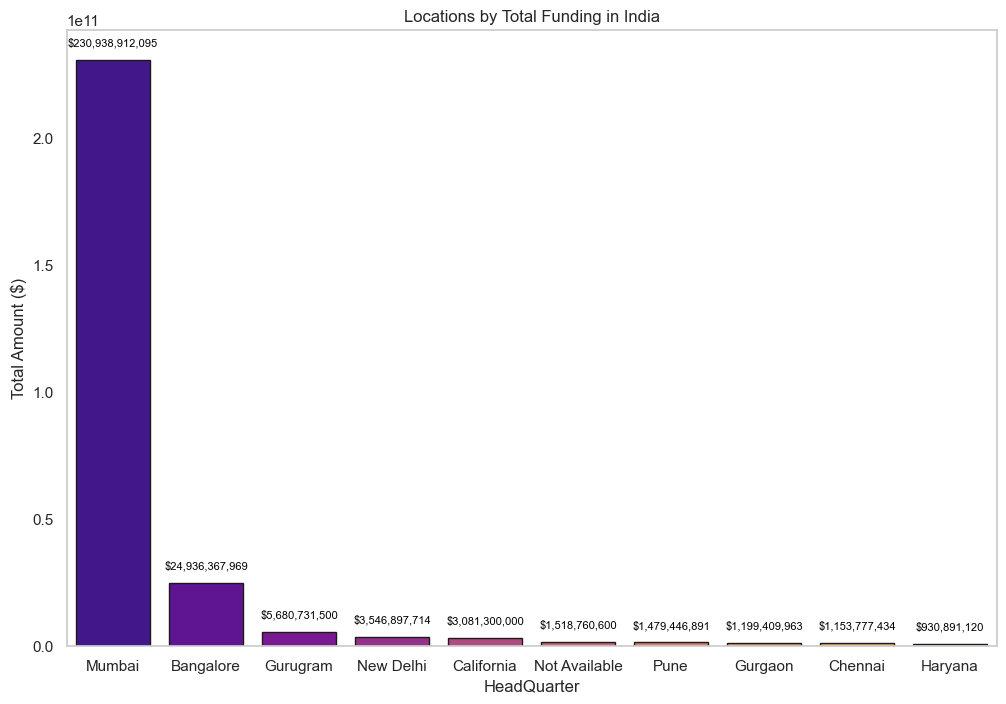

Largest Total Funding(Mumbai): 230938912095.0
Smallest Total Funding(Pune): 930891120.0
Rage Total Funding: 230008020975.0


In [ ]:
# get top hq with the highest total funding

top = 10

top_hq = df.groupby('HeadQuarter')['Amount ($)'].sum().nlargest(top).index
 
# Filter to include only the top locations

df_top_hq = df[df['HeadQuarter'].isin(top_hq)]
 
# Group by 'HeadQuarter' and calculate the total funding for each location

hq_funding = df_top_hq.groupby('HeadQuarter')['Amount ($)'].sum().sort_values(ascending=False).reset_index()
 
# Plotting 

plt.figure(figsize=(12, 8))

sns.set(style="whitegrid")

ax = sns.barplot(x='HeadQuarter', y='Amount ($)', data=hq_funding, palette='plasma', edgecolor='k')

ax.set_xlabel('HeadQuarter')

ax.set_ylabel('Total Amount ($)')

ax.set_title(f'Locations by Total Funding in India')

#ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right') 

ax.grid(False)
 
# Add annotations 

for i, value in enumerate(hq_funding['Amount ($)']):

    formatted_value = "${:,.0f}".format(value)  

    ax.text(i, value + 0.02 * max(hq_funding['Amount ($)']), formatted_value,

            ha='center', va='bottom', color='black', fontsize=8)
 
plt.show()
 
# Get the largest and smallest values

index_largest = hq_funding['Amount ($)'].idxmax()

index_smallest = hq_funding['Amount ($)'].idxmin()
 
# Retrieve the corresponding 'HeadQuarter' values

headquarter_largest = hq_funding.loc[index_largest, 'Amount ($)']

headquarter_smallest = hq_funding.loc[index_smallest, 'Amount ($)']
 
 
# get range amount

Range = headquarter_largest - headquarter_smallest
 
 
print(f"Largest Total Funding(Mumbai): {headquarter_largest}")

print(f"Smallest Total Funding(Pune): {headquarter_smallest}")

print(f"Rage Total Funding: {Range}")

5.  What are the top 10 companies with the highest funding?

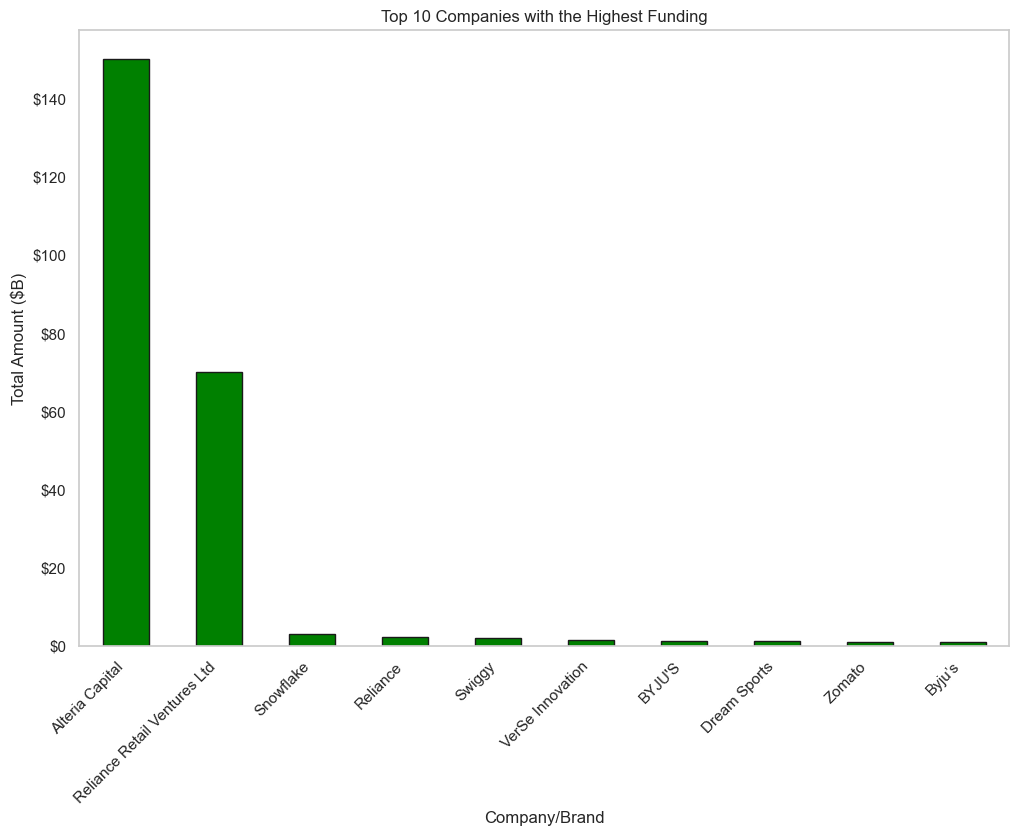

In [ ]:
# get top 10 companies with the highest funding
top_10= 10
top_companies = df.groupby('Company/Brand')['Amount ($)'].sum().nlargest(top_10).index
 
# Filter to include only the top companies
df_top_companies = df[df['Company/Brand'].isin(top_companies)]
 
# Group by 'Company/Brand' and calculate the total funding for each company
company_funding = df_top_companies.groupby('Company/Brand')['Amount ($)'].sum().sort_values(ascending=False)
 
# Convert 'Amount ($)' to billions with two significant figures and dividing by 1 billion
company_funding = company_funding / 1e9  
 
# Plotting
plt.figure(figsize=(12, 8))
ax = company_funding.plot(kind='bar', color='green', edgecolor='k')
plt.xlabel('Company/Brand')
plt.ylabel('Total Amount ($B)')
plt.title('Top 10 Companies with the Highest Funding')
plt.xticks(rotation=45, ha='right') 
plt.grid(False)
 
#Format x-axis ticks with commas and USD
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
 
plt.show()

6.  What is the average amount of funds received by Indian startups at different stages of their life cycle?

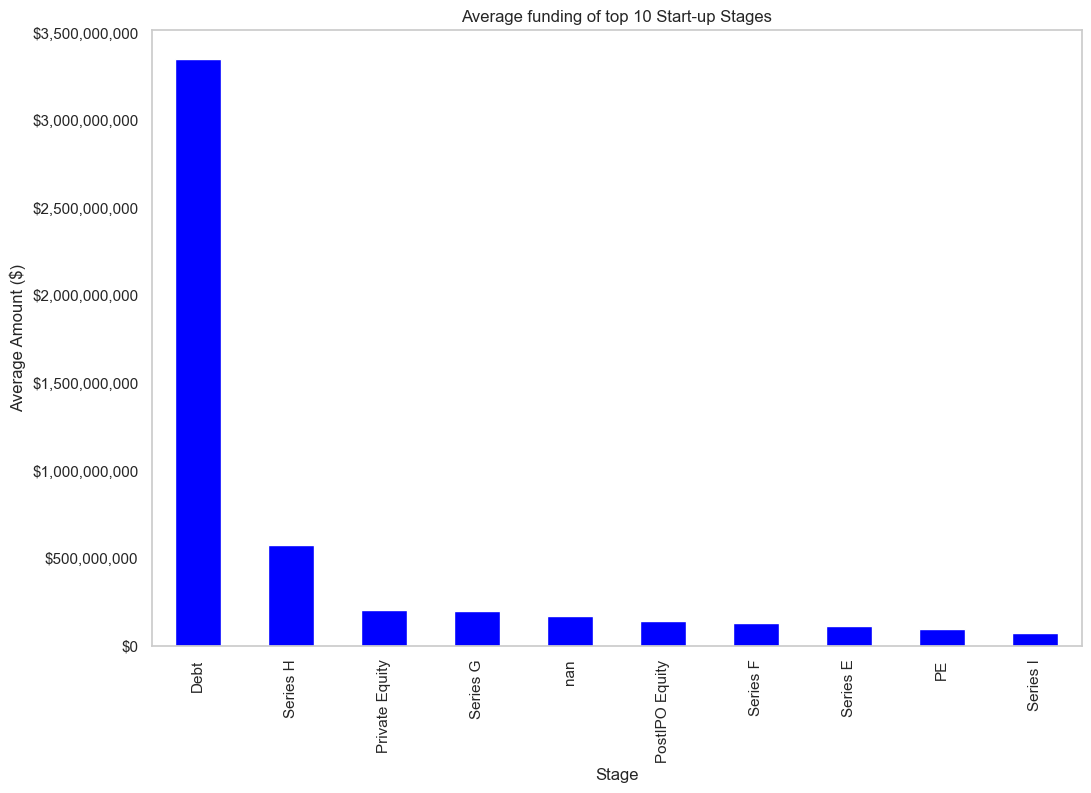

In [ ]:
# Setting up our variables
top_10 = 10
 
# Grouping by 'Stage' and calculating the mean of 'Amount ($)'
top_stage = df.groupby('Stage')['Amount ($)'].mean().nlargest(top_10).index
 
# Filtering the DataFrame based on the top stages
df_top_stage = df[df['Stage'].isin(top_stage)]
 
# Calculating the average funding for each stage in the filtered DataFrame
stage_avg_funding = df_top_stage.groupby('Stage')['Amount ($)'].mean().sort_values(ascending=False)
 
# Plotting the results
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
 
plt.figure(figsize=(12, 8))
 
# Creating a bar plot
ax = stage_avg_funding.plot(kind='bar', color='blue')
 
# Adding labels and title
plt.xlabel('Stage')
plt.ylabel('Average Amount ($)')
plt.title('Average funding of top 10 Start-up Stages')
 
# Formatting y-axis ticks to display currency in dollars
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
 
# Display the plot
plt.grid(False)
plt.show()

7.  What are the startups that received the highest funding each year?

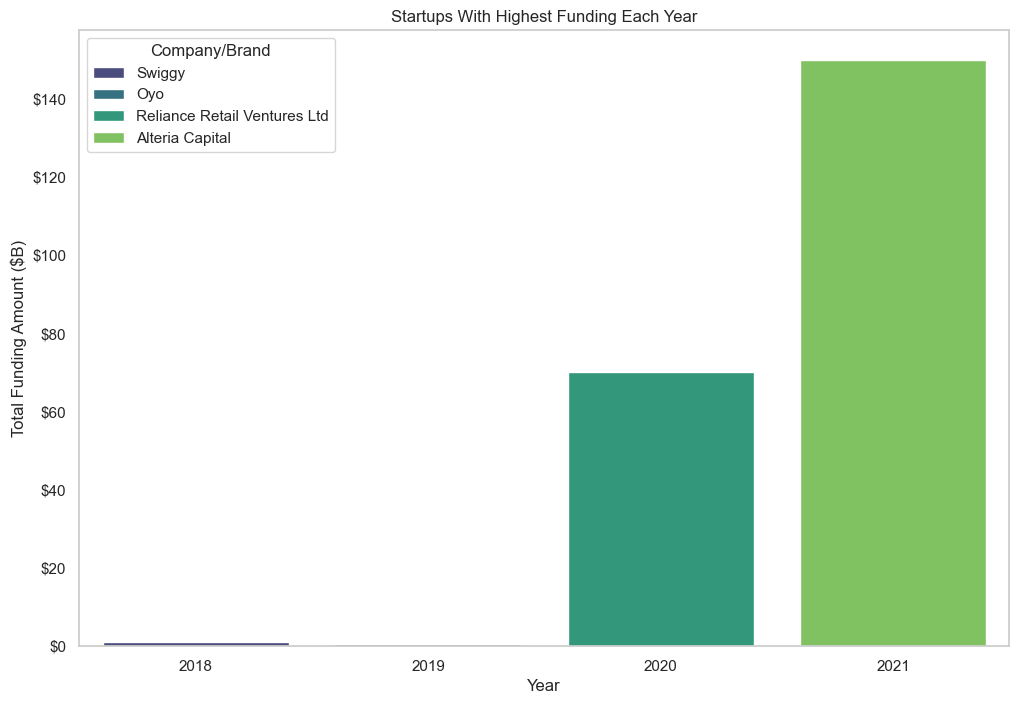

In [ ]:
# format Year using strftime
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')  # coerce errors will replace any invalid dates with NaT
df['Year'] = df['Year'].dt.strftime('%Y')
 
# Group by Year and get the startup with the highest funding each year
startup_each_year = df.loc[df.groupby('Year')['Amount ($)'].idxmax()]
# Convert 'Amount ($)' to billions with two significant figures and dividing by 1 billion
startup_each_year['Amount ($)'] = startup_each_year['Amount ($)'] / 1e9  
 
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Amount ($)', hue='Company/Brand', data=startup_each_year, palette='viridis') #hue to represent the company variable using colour
plt.xlabel('Year')
plt.ylabel('Total Funding Amount ($B)')
plt.title('Startups With Highest Funding Each Year')
plt.grid(False)
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
 
plt.show()

8.  Are there any patterns in the location of a company's headquarters and the amount of funding it receives?

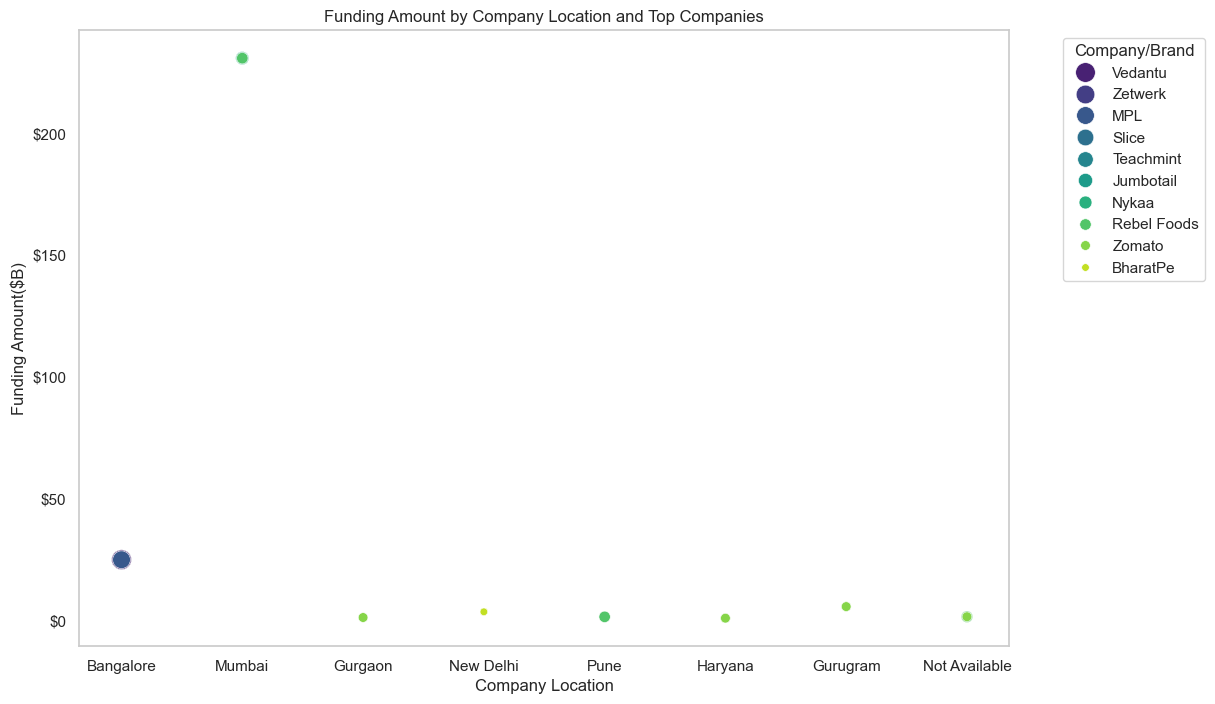

In [117]:
# Group by 'HeadQuarter' and calculate the total funding for each location
hq_funding = df.groupby('HeadQuarter')['Amount ($)'].sum().reset_index()
 
# get the top Company/Brand values based on total funding
top_companies = df['Company/Brand'].value_counts().nlargest(10).index
df_coc_top_companies = df[df['Company/Brand'].isin(top_companies)]
 
# Keep only the top hq based on total funding
top_hq = hq_funding.nlargest(10, 'Amount ($)')
 
# Merge the top hq back into the original DataFrame
df_coc_top_locations = pd.merge(df, top_hq, on='HeadQuarter', how='inner', suffixes=('_original', '_top'))
 
# filter the top Company/Brand values based on total funding within the top locations
top_companies_in_top_locations = df_coc_top_locations['Company/Brand'].value_counts().nlargest(10).index
df_coc_top_locations_top_companies = df_coc_top_locations[df_coc_top_locations['Company/Brand'].isin(top_companies_in_top_locations)]
 
# Convert 'Amount ($)' to billions with two significant figures and dividing by 1 billion
df_coc_top_locations_top_companies['Amount ($)_top'] = df_coc_top_locations_top_companies['Amount ($)_top'] / 1e9  
 
# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='HeadQuarter', y='Amount ($)_top', hue='Company/Brand', data=df_coc_top_locations_top_companies, palette='viridis', size='Company/Brand', sizes=(30, 200))
 
plt.xlabel('Company Location')
plt.ylabel('Funding Amount($B)')
plt.title('Funding Amount by Company Location and Top Companies')
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.grid(False)
plt.legend(title='Company/Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
 
plt.show()